# Nguyễn Ngọc Đạt 11200745  DSEB62


## Bài 1: Cho bài toán XOR
- Implement thuật toán neural network để giải bài toán dùng Pytorch


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

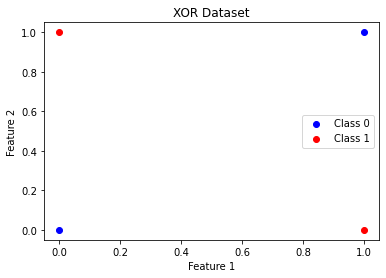

In [45]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

X_0 = X[y == 0]
X_1 = X[y == 1]


plt.scatter(X_0[:, 0], X_0[:, 1], c='blue', label='Class 0')
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('XOR Dataset')
plt.legend()
plt.show()

In [46]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__() 
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU() 
        self.output = nn.Linear(hidden_size,output_size)
    
    def forward(self, x):
        hidden = self.hidden(x)
        activated = self.relu(hidden)
        output = self.output(activated)
        return output 

In [47]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [48]:
input_size = 2
hidden_size = 16
output_size = 1

learning_rate = 0.001
epochs = 1000

network = NeuralNetwork(input_size, hidden_size, output_size)

In [49]:
network

NeuralNetwork(
  (hidden): Linear(in_features=2, out_features=16, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=16, out_features=1, bias=True)
)

In [50]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

In [51]:
def train_neural_network(network, optimizer, loss_fn, X, y, epochs):
    for epoch in range(epochs):
        optimizer.zero_grad() # Đặt gradient về 0

        # Feedforward
        outputs = network(X)

        loss = loss_fn(outputs, y)

        # Backpropagation 
        loss.backward()

        # Cập nhật các tham số của mạng
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

In [52]:
train_neural_network(network, optimizer, loss_fn, X, y, epochs)

Epoch 1/1000, Loss: 0.3759
Epoch 101/1000, Loss: 0.2433
Epoch 201/1000, Loss: 0.1878
Epoch 301/1000, Loss: 0.1188
Epoch 401/1000, Loss: 0.0460
Epoch 501/1000, Loss: 0.0100
Epoch 601/1000, Loss: 0.0011
Epoch 701/1000, Loss: 0.0001
Epoch 801/1000, Loss: 0.0000
Epoch 901/1000, Loss: 0.0000


In [53]:
X_test = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_test = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

with torch.no_grad():
    outputs = network(X_test)
    predicted_labels = (outputs > 0.5).float()
    accuracy = (predicted_labels == y_test).float().mean()

print(f"Accuracy on test data: {accuracy.item():.2f}")

Accuracy on test data: 1.00


## Bài 2: Cho dataset MNIST
- Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch
- Chỉnh learning rate, vẽ đồ thị loss tương ứng.
- Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test.


In [54]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784) #reshape the input to (-1, 784) cause we don't know the dim of input 
        # -1 size of the first dimension will be inferred from the other dimensions. 
        #In this case, the first dimension will be set to the number of elements in the tensor x
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [55]:
# gpu available ?
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [56]:
batch_size = 64 #train on batches of 64 examples at a time.
learning_rate = [0.001, 0.000000001, 1]
num_epochs = 10

In [57]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [58]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
val_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

In [59]:
num_train_samples = int(len(train_dataset) * 0.8)
num_val_samples = len(train_dataset) - num_train_samples

In [60]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [61]:
for data in train_loader:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [62]:
x, y = data[0][0], data[1][0]

print(y)
#print(x)

tensor(8)


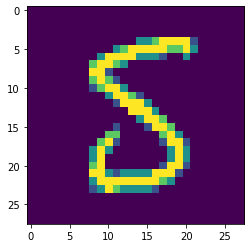

In [63]:
plt.imshow(data[0][2].view(28,28))
plt.show()

In [64]:
total = 0 
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in train_loader:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total +=1 

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [65]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [66]:
model = NN()

# Define the loss function and optimizer
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Learning Rate: 0.001, Epoch [1/10], Train Loss: 0.2358, Val Loss: 0.1081
Learning Rate: 0.001, Epoch [2/10], Train Loss: 0.0842, Val Loss: 0.0750
Learning Rate: 0.001, Epoch [3/10], Train Loss: 0.0566, Val Loss: 0.0663
Learning Rate: 0.001, Epoch [4/10], Train Loss: 0.0419, Val Loss: 0.0722
Learning Rate: 0.001, Epoch [5/10], Train Loss: 0.0322, Val Loss: 0.0629
Learning Rate: 0.001, Epoch [6/10], Train Loss: 0.0276, Val Loss: 0.0747
Learning Rate: 0.001, Epoch [7/10], Train Loss: 0.0222, Val Loss: 0.0821
Learning Rate: 0.001, Epoch [8/10], Train Loss: 0.0188, Val Loss: 0.0732
Learning Rate: 0.001, Epoch [9/10], Train Loss: 0.0183, Val Loss: 0.0786
Learning Rate: 0.001, Epoch [10/10], Train Loss: 0.0129, Val Loss: 0.0742
Learning Rate: 0.001, Accuracy: 0.9825
Learning Rate: 0.001, Precision: 0.9828931572629052
Learning Rate: 0.001, Recall: 0.9995930410011191
Learning Rate: 0.001, F1_Score: 0.9911727616645649


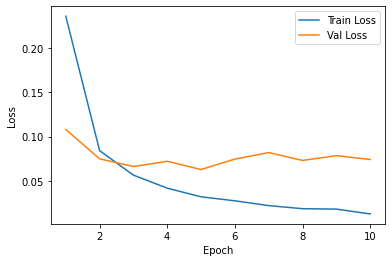

Learning Rate: 1e-09, Epoch [1/10], Train Loss: 2.3003, Val Loss: 2.3002
Learning Rate: 1e-09, Epoch [2/10], Train Loss: 2.3003, Val Loss: 2.3002
Learning Rate: 1e-09, Epoch [3/10], Train Loss: 2.3002, Val Loss: 2.3002
Learning Rate: 1e-09, Epoch [4/10], Train Loss: 2.3002, Val Loss: 2.3001
Learning Rate: 1e-09, Epoch [5/10], Train Loss: 2.3002, Val Loss: 2.3001
Learning Rate: 1e-09, Epoch [6/10], Train Loss: 2.3002, Val Loss: 2.3001
Learning Rate: 1e-09, Epoch [7/10], Train Loss: 2.3002, Val Loss: 2.3001
Learning Rate: 1e-09, Epoch [8/10], Train Loss: 2.3001, Val Loss: 2.3000
Learning Rate: 1e-09, Epoch [9/10], Train Loss: 2.3001, Val Loss: 2.3000
Learning Rate: 1e-09, Epoch [10/10], Train Loss: 2.3001, Val Loss: 2.3000
Learning Rate: 1e-09, Accuracy: 0.1434
Learning Rate: 1e-09, Precision: 0.15310698270339526
Learning Rate: 1e-09, Recall: 0.6934235976789168
Learning Rate: 1e-09, F1_Score: 0.25083085534371174


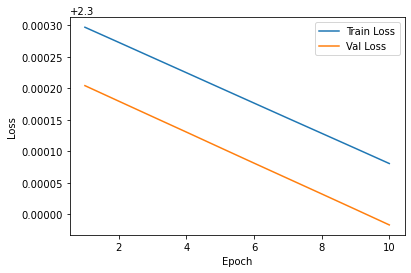

Learning Rate: 1, Epoch [1/10], Train Loss: 753.2584, Val Loss: 3.4764
Learning Rate: 1, Epoch [2/10], Train Loss: 2.3680, Val Loss: 3.5905
Learning Rate: 1, Epoch [3/10], Train Loss: 2.3706, Val Loss: 3.6100
Learning Rate: 1, Epoch [4/10], Train Loss: 2.3734, Val Loss: 3.6283
Learning Rate: 1, Epoch [5/10], Train Loss: 2.3722, Val Loss: 3.6490
Learning Rate: 1, Epoch [6/10], Train Loss: 2.3738, Val Loss: 3.5993
Learning Rate: 1, Epoch [7/10], Train Loss: 2.3703, Val Loss: 3.5731
Learning Rate: 1, Epoch [8/10], Train Loss: 2.3682, Val Loss: 3.7072
Learning Rate: 1, Epoch [9/10], Train Loss: 2.3671, Val Loss: 3.6060
Learning Rate: 1, Epoch [10/10], Train Loss: 2.3743, Val Loss: 3.5958
Learning Rate: 1, Accuracy: 0.1029
Learning Rate: 1, Precision: 0.11607445008460236
Learning Rate: 1, Recall: 0.4755083179297597
Learning Rate: 1, F1_Score: 0.18659896636141082


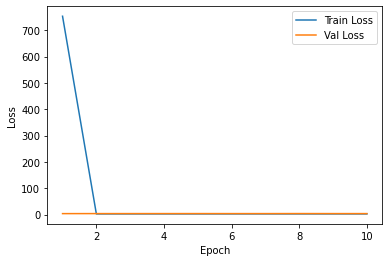

In [67]:
results = []
for lr in learning_rate:
    # Create an instance of the neural network
    model = NN().to(device) #Move tensor to GPU

    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images = images.to(device) #Move tensor to GPU
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0) #tensor to python float * number of image in batch
        
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
        
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        print(f'Learning Rate: {lr}, Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Evaluate on the test set
    model.eval()
    #mse = nn.MSELoss()
    #mae = nn.L1Loss()
    #mape = nn.L1Loss()
    #total_samples = 0
    with torch.no_grad():
        #total_loss = 0.0
        #mse_loss = 0.0
        #mae_loss = 0.0
        #mape_loss = 0.0
        total_correct = 0
        total_samples = 0
        true_positives = 0
        false_negatives = 0
        false_positives = 0

        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            batch_size = images.size(0)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

            for i in range(labels.size(0)):
                if predicted[i] == labels[i]:
                    true_positives += 1
                else:
                    if labels[i] == 1:
                        false_negatives += 1
                    else:
                        false_positives += 1
            #loss = criterion(outputs, labels)
            #total_loss += loss.item() * batch_size
            #mse_loss += mse(outputs.argmax(dim=1).float(), labels.float()) * batch_size
            #mae_loss += mae(outputs.argmax(dim=1).float(), labels.float()) * batch_size
            #mape_loss += mape(outputs.argmax(dim=1).float(), labels.float()) * batch_size
            #total_samples += batch_size
            accuracy = total_correct / total_samples
            precision = true_positives / (true_positives + false_positives)
            recall = true_positives / (true_positives + false_negatives)
            f1_score = 2 * (precision * recall) / (precision + recall)

        #total_loss /= total_samples
        #mse_loss /= total_samples
        #rmse_loss = torch.sqrt(mse_loss)
        #mae_loss /= total_samples
        #mape_loss /= total_samples

        #result = {
            #'learning_rate': lr,
            #'test_mse': mse_loss.item(),
            #'test_rmse': rmse_loss.item(),
            #'test_mae': mae_loss.item(),
            #'test_mape': mape_loss.item() * 100
        #}
        #results.append(result)
        
        print(f'Learning Rate: {lr}, Accuracy: {accuracy}')
        print(f'Learning Rate: {lr}, Precision: {precision}')
        print(f'Learning Rate: {lr}, Recall: {recall}')
        print(f'Learning Rate: {lr}, F1_Score: {f1_score}')

        #print(f"Learning Rate: {lr}, Test MSE: {mse_loss:.4f}")
        #print(f"Learning Rate: {lr}, Test RMSE: {rmse_loss:.4f}")
        #print(f"Learning Rate: {lr}, Test MAE: {mae_loss:.4f}")
        #print(f"Learning Rate: {lr}, Test MAPE: {mape_loss*100:.2f}%")
        #print()
        
        plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
        plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


## Bài 3:
 - Tại sao hàm softmax lại dùng exponential function (e) mà không phải số khác như 2, 3 hoặc 4



The softmax function uses the exponential function because it has several desirable properties:

- It ensures that the outputs of the function are positive. This is important because probabilities must be positive.
- It ensures that the outputs of the function sum to one. This is important because probabilities must sum to one to represent a valid distribution.
- It is differentiable. This is important because it allows the softmax function to be used in gradient descent to train neural networks.
- The exponential function combined with the normalization in the softmax is that high scores in 𝑥 become much more probable than low scores.